In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MatPlotlib
照着官网去模仿

## 折线图
* 折线图内容：画出1948年1月-12月的失业率走势
* 数据：UNRATE.CSV

In [3]:
unrate = pd.read_csv("unrate.csv")
# 将DATE字段数据转换成标准的时间格式
unrate["DATE"] = pd.to_datetime(unrate["DATE"])
# 打印出前12条数据
print(unrate.head(12))

         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


* 画图操作

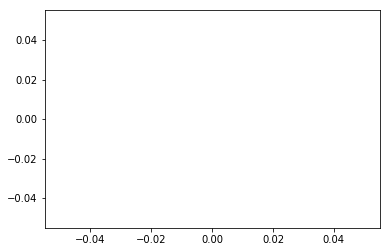

In [6]:
# 画图
plt.plot()
# 展示图
plt.show()

* 准备好要展示的内容
### 设置x轴文字倾斜角度

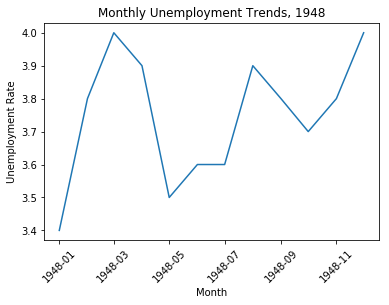

In [15]:
# 准备好要展示的1948年的12条数据
first_twelve = unrate[0:12]
plt.plot(first_twelve["DATE"], first_twelve["VALUE"])

# 指定x轴坐标的倾斜角度（如果传进来的参数特别多，可以斜着书写以展示得开）
plt.xticks(rotation=45)

# 标注xy轴的标题和整体标题
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

# 展示图表
plt.show()


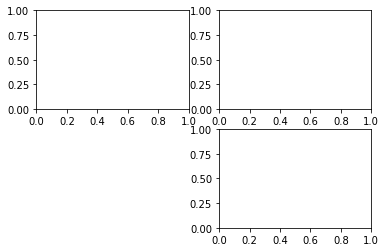

In [24]:
# 添加一个画布，指定画图区间fig
fig = plt.figure()

# 添加一个四行三列的子图区域，并且在第一个位置添加子图
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax4 = fig.add_subplot(2,2,4)

# 展示当前图形
plt.show()

### 添加子图操作

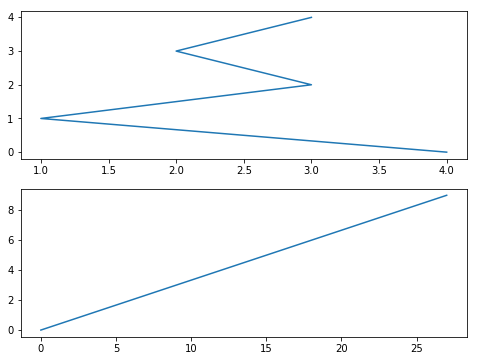

In [145]:
# 指定画图区域，并且规定其大小为8*6
fig = plt.figure(figsize=(8, 6))

# 添加子图，赋值给子图变量
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# 给子图变量添加数据：
# ax1：横坐标：生成从1开始到5结束的5个整数随机数，纵坐标：0、1、2、3、4
# ax2：横坐标：三倍从0开始到9结束（0-27），纵坐标：从0-9
ax1.plot(np.random.randint(1,5,5), np.arange(5))
ax2.plot(np.arange(10)*3, np.arange(10))
plt.show()

### 同一个图中画多条折线

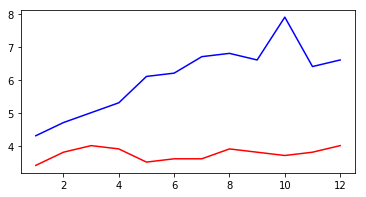

In [60]:
# 从DATE字段中提取出MONTH
unrate['MONTH'] = unrate['DATE'].dt.month

# 指定画图区间大小为6*3
fig = plt.figure(figsize=(6,3))

# 取出1-12个月的数据画红线，取出13-24个月的数据画蓝线
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

# 展示出所画图形
plt.show()

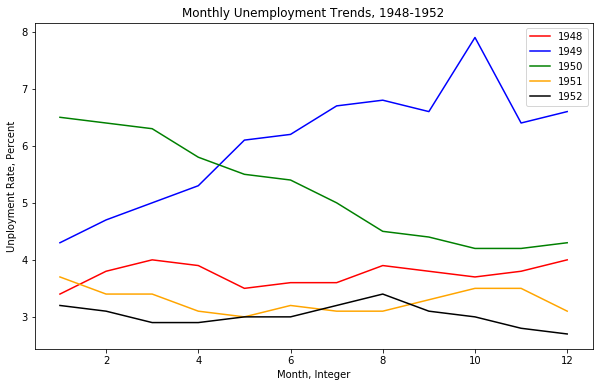

In [76]:
# 在一个图中指定颜色范围，画5条曲线
fig = plt.figure(figsize=(10,6))
colors = ["red", "blue", "green", "orange", "black"]

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    # 设置区间范围子集，每次都取出来这个区间的12个数据
    subset = unrate[start_index:end_index]
    # 设置曲线备注说明内容
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

# 展示曲线备注说明（自定义觉得放在什么位置合适）
plt.legend(loc='best')
# plt.legend(loc='upper left')
# print(help(plt.legend))

plt.xlabel("Month, Integer")
plt.ylabel("Unployment Rate, Percent")
plt.title("Monthly Unemployment Trends, 1948-1952")

# 展示曲线
plt.show()

关于loc的说明
```
Location String   Location Code
===============   =============
'best'            0
'upper right'     1
'upper left'      2
'lower left'      3
'lower right'     4
'right'           5
'center left'     6
'center right'    7
'lower center'    8
'upper center'    9
'center'          10
===============   ============
```

## 柱形图
电影评分

In [80]:
reviews = pd.read_csv("fandango_scores.csv")

# 选取画图数据字段
cols = ["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]

# 取出所选字段数据
norm_reviews = reviews[cols]

# 打印出所选数据的第一行样本
print(norm_reviews[:1])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0  


### 纵向条形图

[4.3 3.55 3.9 4.5 5.0]
[0.75 1.75 2.75 3.75 4.75]


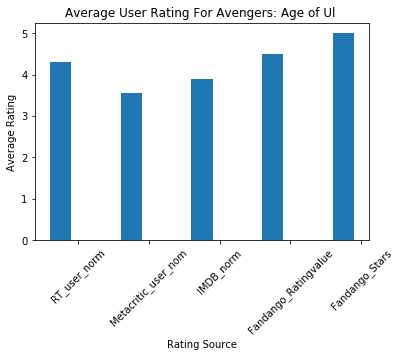

In [147]:
import matplotlib.pyplot as plt
import numpy
from numpy import arange

# 取出所要考察的列
num_cols = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]

# 将所考察的列的values拿出来，即为影响柱形图高度的值
bar_heights = norm_reviews.loc[0, num_cols].values
# print(bar_heights)

# 用plt.subplots()现将画布画出来，再取出ax值（fig参数控制图长的样子）
fig, ax = plt.subplots()

# 1.柱状图每个柱子距离原点有多远
bar_positions = arange(5) + 0.75
# print(bar_positions)

# 2.使用ax设置x轴上的标签绝对位置及其内容
# 位置
tick_positions = range(1,6)
ax.set_xticks(tick_positions)
# 内容
ax.set_xticklabels(num_cols, rotation=45)


# 3.使用ax画柱子图：传进来x和y轴的数值，并且指定柱形图的宽度为0.3
ax.bar(bar_positions, bar_heights, 0.3)

# 4.设置x、y轴标签和标题内容
ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ul ')
plt.show()

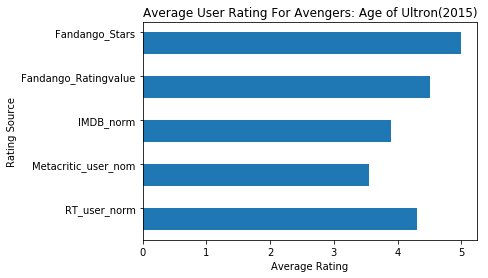

In [111]:
# 影响柱状图宽度的值
bar_widths = norm_reviews.loc[0, num_cols].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()

# 绘制横向柱状图（内容&宽度）
ax.barh(bar_positions, bar_widths, 0.5)

# 设置y轴值和位置
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')

# 设置x轴标签
ax.set_xlabel('Average Rating')

ax.set_title('Average User Rating For Avengers: Age of Ultron(2015)')

plt.show()

### 横向条形图

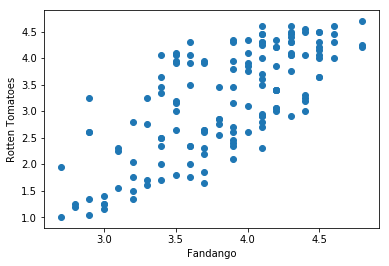

In [112]:
# 画散点图
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])

ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

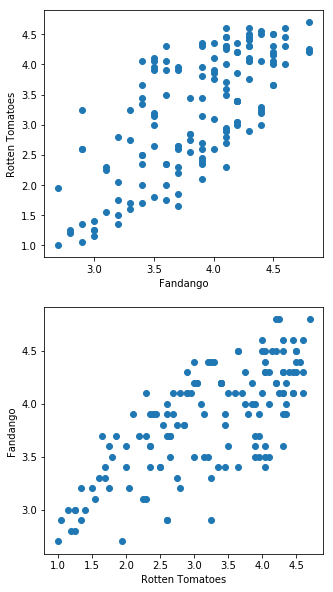

In [114]:
# 用子图画两幅散点图
fig = plt.figure(figsize=(5,10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')

ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

### 柱形图与盒图

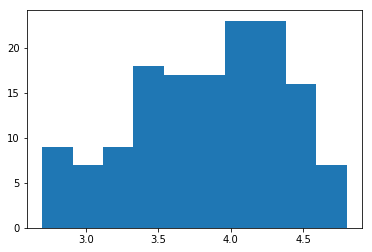

In [117]:
# 指定bins，并且将区间画出来

# 不指定bins数值时，默认分10个区间
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'])
plt.show()

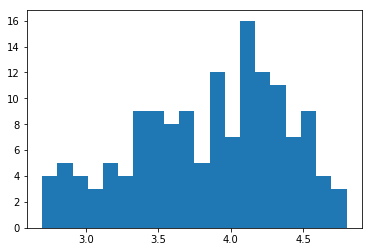

In [119]:
# 指定bins数值为20时
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20)
plt.show()

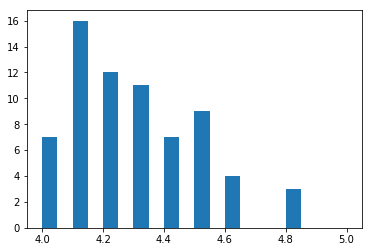

In [126]:
# 指定bins所在显示区间为(4,5)范围内时
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(4,5), bins=20)
plt.show()

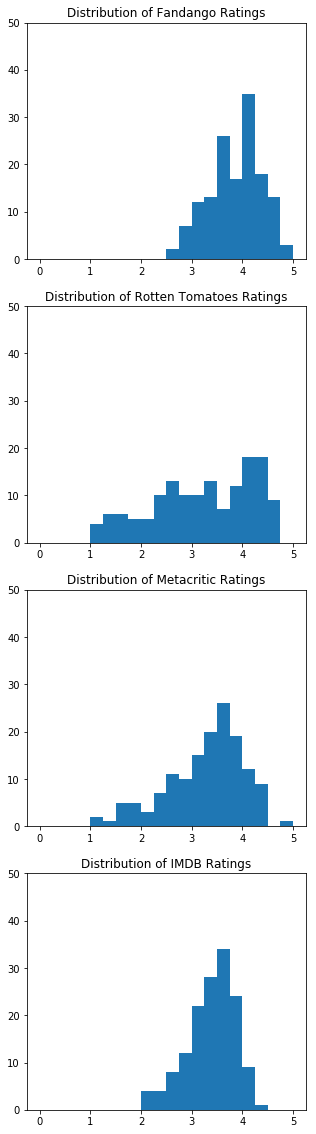

In [127]:
# 画多个子图
fig = plt.figure(figsize=(5,20))

ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
# 指定y轴的区间范围
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

### 箱线图

![](http://pu65q6pd8.bkt.clouddn.com/%E7%AE%B1%E7%BA%BF%E5%9B%BE.png)
分别展示的是整个数据（评分）在四分之一、二分之一、四分之三处的数值，画在了纵坐标上

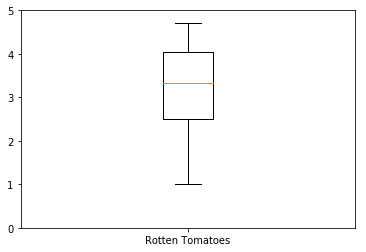

In [129]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0,5)
plt.show()

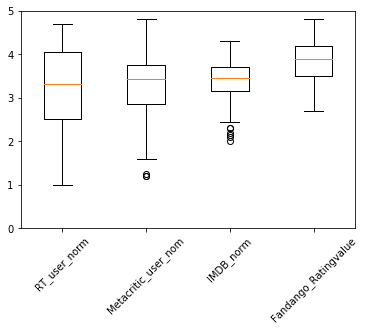

In [132]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots()
# 传参画箱线图
ax.boxplot(norm_reviews[num_cols].values)
# 将横轴标题的值旋转90度
ax.set_xticklabels(num_cols, rotation=45)
ax.set_ylim(0,5)
plt.show()

# 细节设置
## 自定义设置RGB颜色
## 设置线宽
## 不显示坐标轴
## 取消坐标轴上的坐标刻度
## 在图上指定位置标注文字

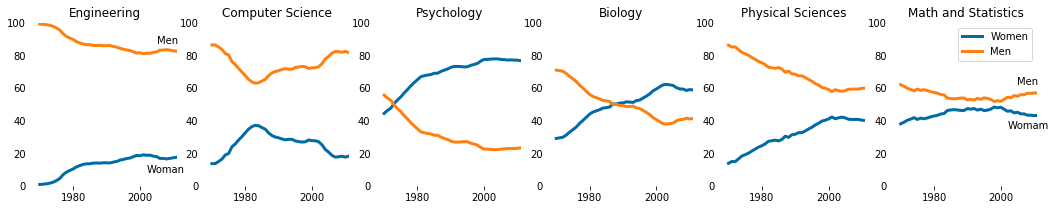

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# 查看1970-2010年，各个学科的男女学生分布比率
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# 1.自定义两种RGB颜色
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    
    # 2.画图，设置线宽
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # 3.不显示坐标轴
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    
    # 依次设置曲线标题
    ax.set_title(stem_cats[sp])
    
    # 4.取消坐标轴上的坐标刻度
    ax.tick_params(bottom=True, top=False, left=False, right=False)
    
    # 5.在图上指定位置标注文字(第一个图和第六个图：横坐标年份，纵坐标百分比，名称)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Woman')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2002, 35, 'Womam')
    
plt.legend(loc="upper right")
plt.show()

